# 日経平均株価予測

In [16]:
# ライブラリインポート
# 時刻取得、操作
import datetime

# データ操作
import pandas as pd

# 数値計算
import numpy as np

# グラフ描画
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

# 株価取得
import yfinance as yf

# Pandasのオプション
pd.options.display.max_columns=100
pd.options.display.max_rows=50

# Jupyter Notebookを使用している人は以下を記述
%matplotlib inline

### データ取得

In [2]:
# 取得日付を指定
start = datetime.datetime(2020, 1, 5)
end = datetime.date.today()

In [3]:
# 株の銘柄コード、ティッカーシンボル設定
# 今回は日経平均株価（日経225）
stock_code = '^N225'

In [4]:
# 株価取得
# <変数> = yf.download(tickers=<銘柄コード>, start=<開始日>, end=<終了日>)
nikkei = yf.download(tickers=stock_code, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# データ型の確認
# print(<変数> or <文字列>)
# 変数の中身や文字列を出力
# type(<変数>)
# 変数のデータ型を確認
print(type(nikkei))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# <データフレーム>.dtypes
# データフレームの'dtypes'というメソッド（関数）を使用
# データフレーム内各列のデータ型を得る
print(nikkei.dtypes)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [7]:
# データの確認
# headメソッド
# （）内の数値の行数をデータフレームの先頭から表示
nikkei.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-06,23319.759766,23365.359375,23148.529297,23204.859375,23204.859375,72800000
2020-01-07,23320.119141,23577.439453,23299.919922,23575.720703,23575.720703,64300000
2020-01-08,23217.490234,23303.210938,22951.179688,23204.759766,23204.759766,79400000
2020-01-09,23530.289062,23767.089844,23506.150391,23739.869141,23739.869141,62200000
2020-01-10,23813.279297,23903.289062,23761.080078,23850.570312,23850.570312,55900000
2020-01-14,23969.039062,24059.859375,23951.660156,24025.169922,24025.169922,64200000
2020-01-15,23923.480469,23997.390625,23875.820312,23916.580078,23916.580078,57200000
2020-01-16,23960.199219,23975.380859,23905.380859,23933.130859,23933.130859,55400000
2020-01-17,24103.449219,24115.949219,24013.750000,24041.259766,24041.259766,59400000


In [8]:
# null値確認
nikkei.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

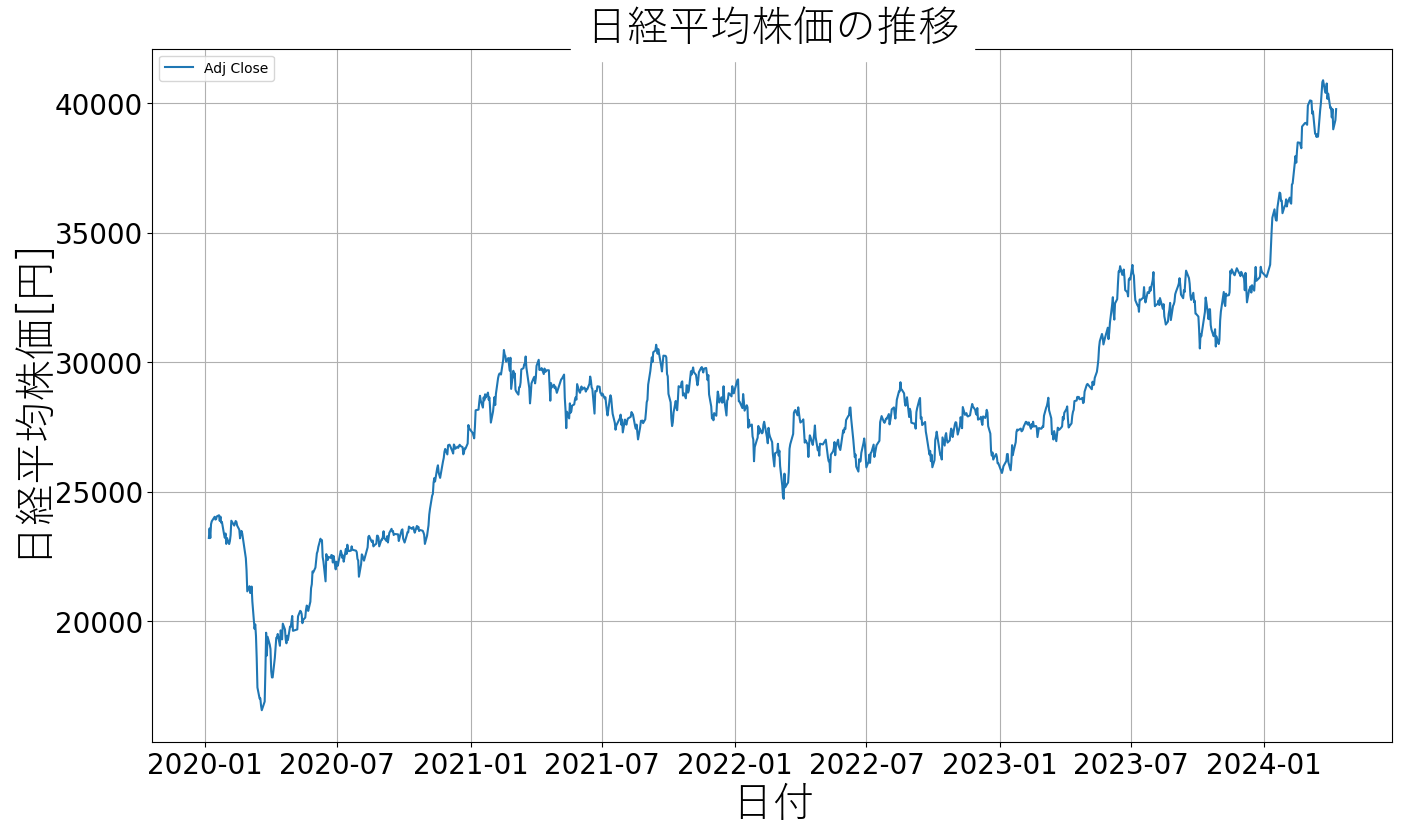

In [9]:
# plt.plot(nikkei.index, nikkei['Close'], label="Close")
plt.figure(figsize=(16, 9))
plt.plot(nikkei.index, nikkei['Adj Close'], label="Adj Close")

plt.title("日経平均株価の推移", color='black', backgroundcolor='white', size=30, loc='center', fontname='Yu Gothic')
plt.xlabel("日付", color='black', size=30, fontname='Yu Gothic')
plt.ylabel("日経平均株価[円]", color='black', size=30, fontname='Yu Gothic')
plt.xticks(size=20)
plt.yticks(size=20)

plt.legend()
plt.grid()
plt.show()
# plt.tight_layout()
# plt.savefig('hoge.png')

In [10]:
# 特徴量エンジニアリング
# 単純移動平均 Simple Moving Average (SMA)
# 終値の単純移動平均を計算
def simpleMovingAverage(df, spanlist):
    for span in spanlist:
        column_name = f"{span}SMA"
        df[column_name] = df['Close'].rolling(span, min_periods=1).mean()

In [11]:
spanlist = [20, 50, 200]
simpleMovingAverage(nikkei, spanlist)

In [12]:
nikkei.head()

,Open,High,Low,Close,Adj Close,Volume,20SMA,50SMA,200SMA
Date,,,,,,,,,
2020-01-06,23319.759766,23365.359375,23148.529297,23204.859375,23204.859375,72800000,23204.859375,23204.859375,23204.859375
2020-01-07,23320.119141,23577.439453,23299.919922,23575.720703,23575.720703,64300000,23390.290039,23390.290039,23390.290039
2020-01-08,23217.490234,23303.210938,22951.179688,23204.759766,23204.759766,79400000,23328.446615,23328.446615,23328.446615
2020-01-09,23530.289062,23767.089844,23506.150391,23739.869141,23739.869141,62200000,23431.302246,23431.302246,23431.302246
2020-01-10,23813.279297,23903.289062,23761.080078,23850.570312,23850.570312,55900000,23515.155859,23515.155859,23515.155859


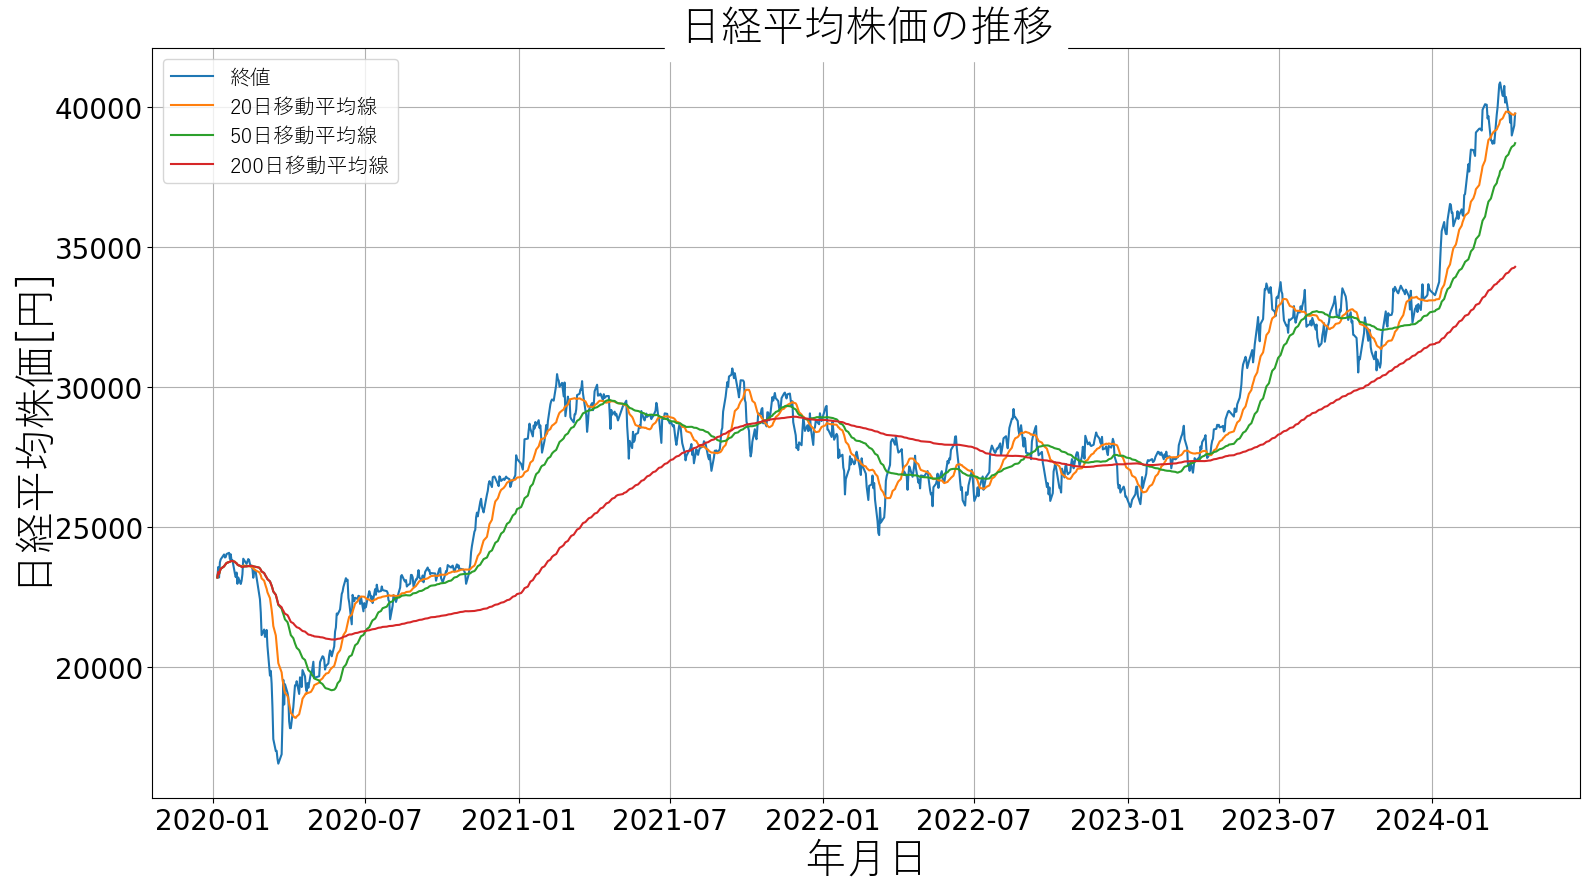

In [13]:
# plt.plot(nikkei.index, nikkei['Close'], label="Close")
plt.figure(figsize=(16, 9))
plt.plot(nikkei.index, nikkei['Adj Close'], label="終値")
plt.plot(nikkei.index, nikkei['20SMA'], label="20日移動平均線")
plt.plot(nikkei.index, nikkei['50SMA'], label="50日移動平均線")
plt.plot(nikkei.index, nikkei['200SMA'], label="200日移動平均線")

plt.title("日経平均株価の推移", color='black', backgroundcolor='white', size=30, loc='center', fontname='Yu Gothic')
plt.xlabel("年月日", color='black', size=30, fontname='Yu Gothic')
plt.ylabel("日経平均株価[円]", color='black', size=30, fontname='Yu Gothic')
plt.xticks(size=20)
plt.yticks(size=20)

plt.legend(loc='best', prop={'family': 'Yu Gothic', 'size':15})
plt.grid()
plt.tight_layout()
# plt.savefig('hoge.png')
plt.show()

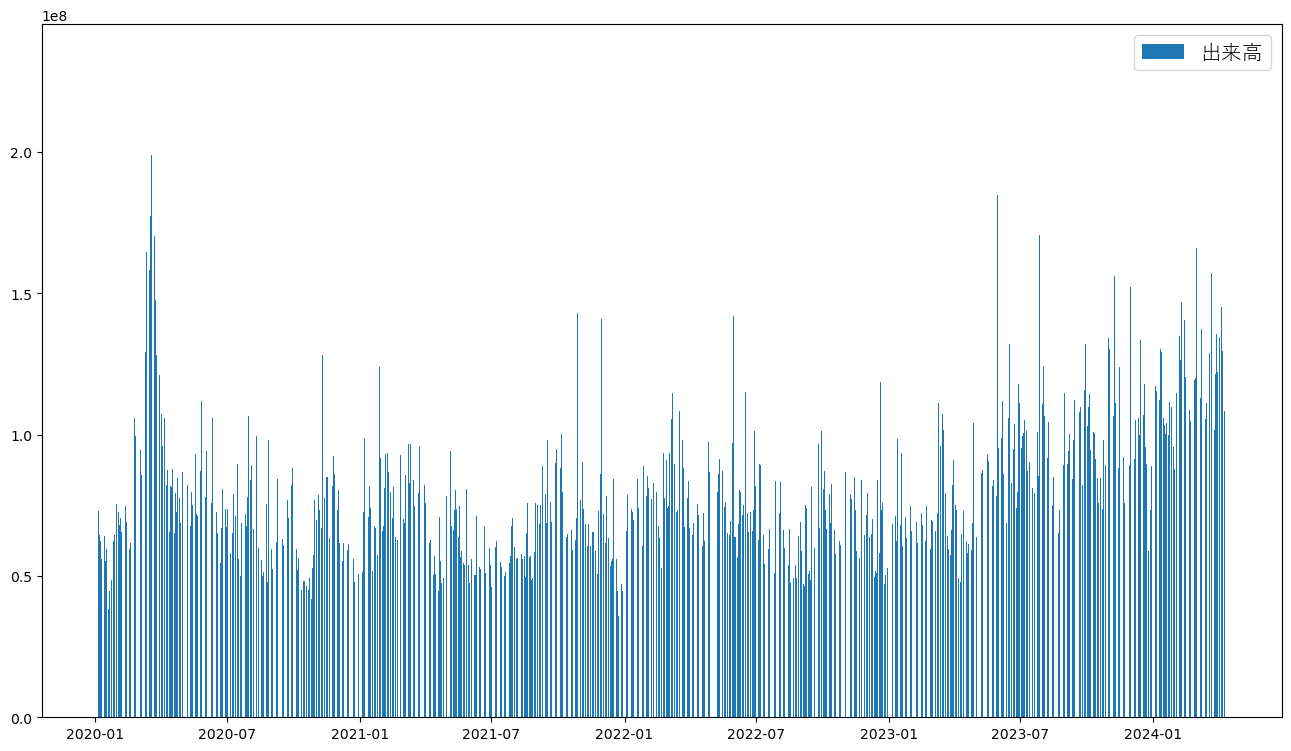

In [14]:
plt.figure(figsize=(16, 9))
plt.bar(nikkei.index, nikkei['Volume'], label="出来高")

plt.legend(loc='best', prop={'family':'Yu Gothic', 'size':15})
plt.show()

In [39]:
# # plt.figure(figsize=(16, 9))
# import matplotlib.patches as mpatches
# fig, axes = mpf.plot(nikkei, type='candle', style='yahoo', axtitle='N225', volume=True, mav=(20,50,200), figsize=(16,9), figratio=(16,9), datetime_format='%Y/%m/%d', warn_too_much_data=100000, returnfig=True)
# legend = ["20SMA", "50SMA", "200SMA"]
# # ma2_patch = mpatches.Patch(color='red', label='20SMA')
# # ma4_patch = mpatches.Patch(color='green', label='50SMA')
# # ma6_patch = mpatches.Patch(color='#405173', label='200SMA')
# # axes[0].legend(handles=[ma2_patch, ma4_patch, ma6_patch])
# # axes[0].legend(legend)

# fig.show()

In [37]:
cdf = nikkei.copy()#[datetime.datetime(2021,10,1):datetime.datetime(2022,2,28)]
apd = {"20SMA":mpf.make_addplot(cdf['20SMA'], color="blue"),        # 書籍(修正版)のコード
       "50SMA":mpf.make_addplot(cdf['50SMA'], color="green"),
       "200SMA":mpf.make_addplot(cdf['200SMA'], color="red")
    }

C:\Users\Tomoki Yako\AppData\Local\Temp\ipykernel_11928\2878339667.py:16: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


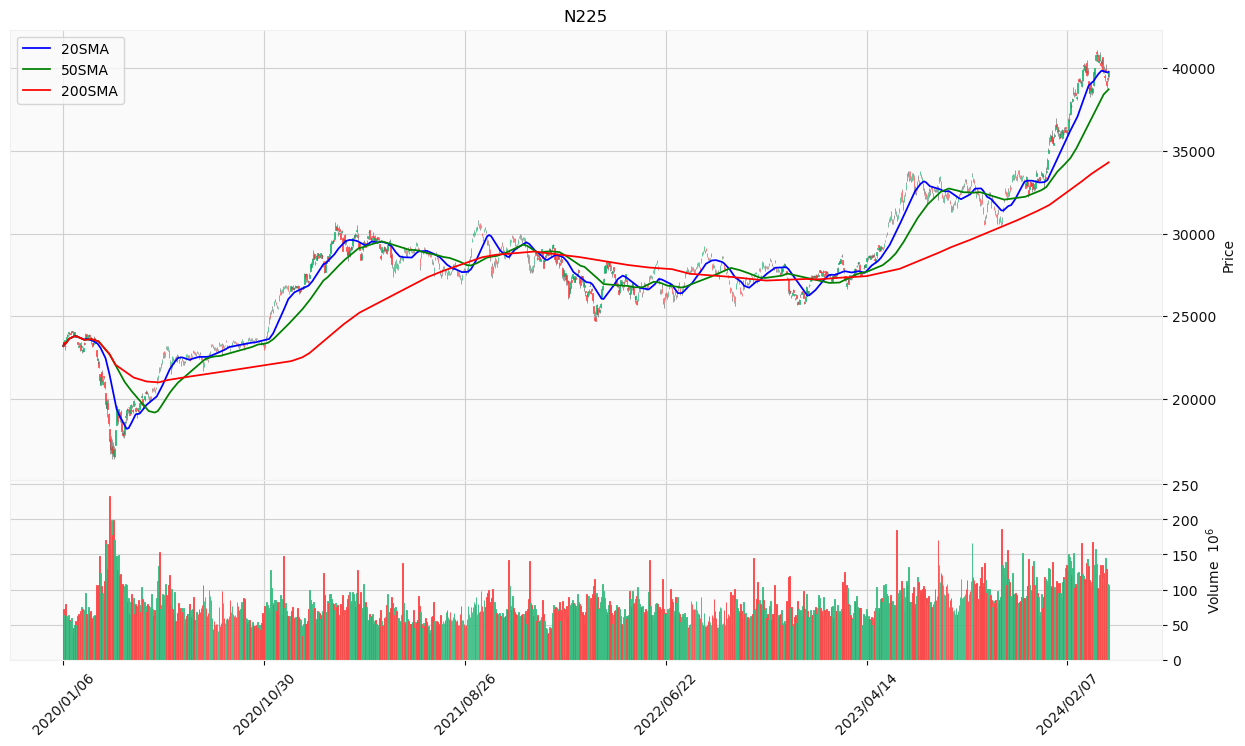

In [38]:
fig, axes = mpf.plot(cdf,
                     type='candle',
                     style='yahoo',
                     axtitle='N225',
                     volume=True,
                    #  mav=(20,50,200),
                     addplot=list(apd.values()),
                     figsize=(16,9),
                     figratio=(16,9),
                     datetime_format='%Y/%m/%d',
                     warn_too_much_data=100000,
                     returnfig=True
                     )

axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))

plt.show()